# Reconstruct the Word Cloud

## Go to the bottom of the to run this program for all the iterations

In [ ]:
import cv2
import matplotlib.pyplot as plt

True

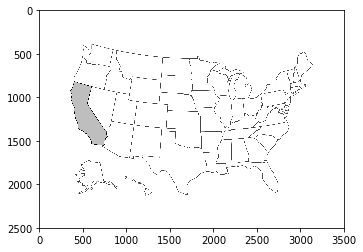

In [4]:
# import whole US
US_img = cv2.imread('us_states/CA.png',1)
plt.imshow(US_img)
US_img.shape
cv2.imwrite('process_figs/step1_US_img.png',US_img)

# Use the CA mask to cut out CA from of the US image
- ## import CA mask
- ## invert CA mask
- ## USE bitwise OR on img_US with CA_mask_inv

True

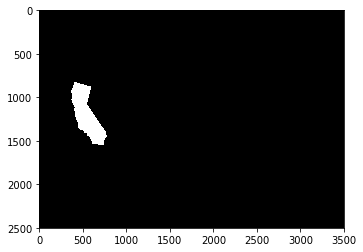

In [5]:
# import the CA mask
CA_mask = cv2.imread('us_states_masks/CA_mask.png',0)
plt.imshow(CA_mask,cmap='gray')
CA_mask.shape
cv2.imwrite('process_figs/step2_CA_mask.png',CA_mask)

True

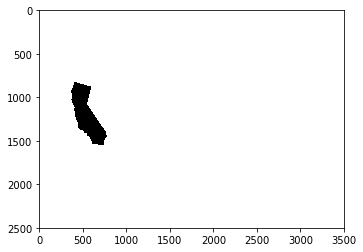

In [6]:
# Get the inv
CA_mask_inv = cv2.bitwise_not(CA_mask)
plt.imshow(CA_mask_inv,cmap='gray')
cv2.imwrite('process_figs/step3_CA_mask_inv.png',CA_mask_inv)

True

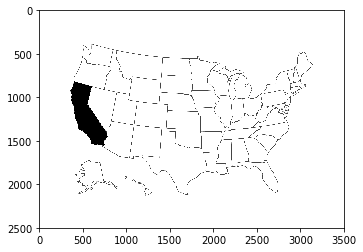

In [7]:
# Use bitwise_OR
cut_US_img = cv2.bitwise_or(US_img,US_img,mask = CA_mask_inv)
plt.imshow(cut_US_img)
cv2.imwrite('process_figs/step4_cut_US_img.png',cut_US_img)

# Place California into the image
- ## import CA_wc
- ## use bitwise OR on CA_wc with CA_mask
- ## use bitwise AND on cut_CA_wc with cut_US_img

True

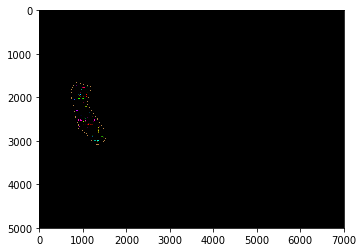

In [8]:
# import the CA fig
CA_wc = cv2.imread('figs/word_cloud_masked_data-scientist_CA.png',-1)
plt.imshow(CA_wc)
CA_wc.shape
cv2.imwrite('process_figs/step5_CA_wc.png',CA_wc)

In [9]:
# use bitwise OR on CA_wc with CA_mask_inv
cut_CA_wc = cv2.bitwise_or(CA_wc,CA_wc,mask = CA_mask)
plt.imshow(cut_CA_wc)
cut_CA_wc.shape
cv2.imwrite('process_figs/step6_cut_CA_wc.png',cut_CA_wc)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/core/src/arithm.cpp:241: error: (-215:Assertion failed) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function 'binary_op'


In [ ]:
# use bitwise AND on cut_CA_wc with cut_US_img
US_wc = cv2.bitwise_or(cut_CA_wc,cut_US_img)
plt.imshow(US_wc)
US_wc.shape
cv2.imwrite('process_figs/step7_US_wc.png',US_wc)

In [2]:
import cv2
import matplotlib.pyplot as plt

# Make a Function to Reconstruct the US Word Cloud Image using the Word Clouds for Every State

In [3]:
def get_US_word_cloud(state,scale,scale_factor,job_search):
    '''
    This function inserts the word cloud for each us state and inserts it into the map 
    of the whole US
    
    Note: before accessing this function, store an empty full scale US map in the 
          us_word_clouds folder with the format: 'us_word_clouds/US_map_wc_scale'+str(scale*scale_factor)+'.png'
        
    
    input:
    - state: the state of the word cloud being used

    - scale: the scale of the smaller mask that was used
    
    - scale_factor: the factor that when multiplied by the small scale gives the scale
                    of the full size image
    
    - job_seach: the job search used to collect the data
    
    output:
    There is no output. An image of the modified US word cloud is stored in the 
    US_word_clouds folder.
    '''
    try: 
        # import full scale US image
        US_img = cv2.imread('us_word_clouds/US_map_wc_scale_'+str(scale*scale_factor)+'.png',1)
        
        # import the full scale state mask
        state_mask = cv2.imread('us_states_masks/'+str(state)+'_scale_'+str(scale*scale_factor)+'_mask.png',0)

        # Get the inv
        state_mask_inv = cv2.bitwise_not(state_mask)

        # Use bitwise_OR
        cut_US_img = cv2.bitwise_or(US_img,US_img,mask = state_mask_inv) 

        # import the full scale state word cloud 
        state_wc = cv2.imread('us_states_word_clouds/masked_word_cloud_'+str(state)+'_scale_'+str(scale*scale_factor)+'.png',-1)

        # use bitwise OR on state_wc with state_mask_inv
        cut_state_wc = cv2.bitwise_or(state_wc,state_wc,mask = state_mask)

        # use bitwise AND on cut_CA_wc with cut_US_img
        US_wc = cv2.bitwise_or(cut_state_wc,cut_US_img)
        
        # write the modified full scale us map image
        cv2.imwrite('us_word_clouds/US_map_wc_scale_'+str(scale*scale_factor)+'.png',US_wc)

        print('the word cloud was successfully added for the state: '+str(state))
        
    except Exception as e:
        print(str(state)+' has error: '+str(e))

# Reconstruct the word clouds for every state!

## Import the data needed for inputs

In [4]:
# import the scale for small_scale us image scale and the scale_factor for 
# the full scale us image scale
with open('scale_and_scale_factor.txt','r') as output:
    scale,scale_factor = output.read().split(',')

# store small scale image scales 
scale = int(scale)

# store scale factor to create a wc with the full scale image size
scale_factor = int(scale_factor)

In [5]:
# Import the job search
with open('job_search.txt','r') as output:
    job_search = output.read()

In [6]:
# List of US States for ref
states = [ "CA", "AK", "AZ", "AR", "AL", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [7]:
# import full scale US and store it in the US_word_clouds folder
US_img = cv2.imread('us_map/US_map_scale_'+str(scale*scale_factor)+'.png',1)
cv2.imwrite('us_word_clouds/US_map_wc_scale_'+str(scale*scale_factor)+'.png',US_img)

True

## Iterate through every state using the get_US_word_cloud function

In [8]:
[get_US_word_cloud(state,scale,scale_factor,job_search)
for state in states]

the word cloud was successfully added for the state: CA
the word cloud was successfully added for the state: AK
the word cloud was successfully added for the state: AZ
the word cloud was successfully added for the state: AR
the word cloud was successfully added for the state: AL
the word cloud was successfully added for the state: CO
the word cloud was successfully added for the state: CT
the word cloud was successfully added for the state: DE
the word cloud was successfully added for the state: FL
the word cloud was successfully added for the state: GA
the word cloud was successfully added for the state: HI
the word cloud was successfully added for the state: ID
the word cloud was successfully added for the state: IL
the word cloud was successfully added for the state: IN
the word cloud was successfully added for the state: IA
the word cloud was successfully added for the state: KS
the word cloud was successfully added for the state: KY
the word cloud was successfully added for the st

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]